# Week 2 Assignment - Programmatically Calculating Linear Regressions

This assignment puts into practice estimating the parameters of a linear regression. The data for this assignment is provided in the "data" folder in this directory. The assignment was done in Octave/MATLAB, but we're going to do it here with Python.

## Univariable Linear Regression
We'll first perform a linear regression on a single variable. The first example is the population of a city and the associated profit of a food truck in that city. We'll use that to perform a linear regression to estimate the profits expected for opening a restaurant in a city of a certain population. Let's first read and plot the data from the input file.

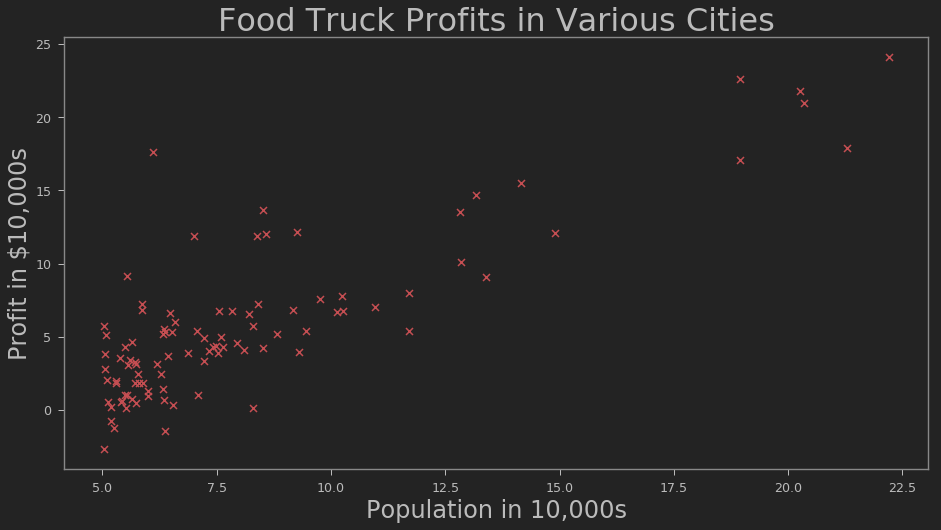

In [2]:
# Import modules 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)

# Set the data location
dataDir = "./assignment/ex1/"
dataFile = "ex1data1.txt"
dataPath = dataDir+dataFile

# Load the data
data = pd.read_csv(dataPath,header=None).values
X = np.expand_dims(data[:,0],axis=1)
y = np.expand_dims(data[:,1],axis=1)
m = len(X)

# Create the plot of the training data
fig=plt.figure(figsize=(12,6));
ax=fig.add_axes([0,0,1,1]);
ax.scatter(X,y,color='r',marker="x");
ax.set_xlabel('Population in 10,000s',fontsize=24);
ax.set_ylabel('Profit in $10,000s',fontsize=24);
ax.set_title('Food Truck Profits in Various Cities',fontsize=32);

Next we'll estimate the cost function of an initial guess for our intercept and slope, and then we'll perform a gradient descent algorithm to minimize the cost function from that initial guess. Remember that the cost function is written as 

$$ 
\begin{align}
J (\theta) & = \frac{1}{2 m} \sum_{i=1}^m \Big( h_\theta(x^{(i)}) - y^{(i)} \Big)^2 
\end{align}
$$

and the hypothesis function is given by the linear model (for a single variable) as

$$ 
\begin{align}
h (\theta) & = \theta_0 + \theta_1 x_1 \\
           & = \theta^T x
\end{align}
$$

while our gradient descent algorithm is 

$$
\theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^m \Big( h_\theta (x^{(i)}) - y^{(i)} \Big) x_j^{(i)}.
$$

Let's first define some functions to calculate these.

In [3]:
# Define function to calculate cost function
def cost_function(X,y,theta):
    
    """For a given training sample and given parameter guess, calculate the cost function"""
    
    # Get the number of training samples
    m = len(y)
    
    # Calculate the cost function
    h = np.matmul(X,theta)
    J = (1./(2.*m))*np.matmul(np.transpose(h-y),h-y)
    
    # Return cost function value for given theta
    return float(J)

# Define function to perform gradient descent
def gradient_descent(X,y,theta,alpha,iterations):
    
    """Perform gradient descent for a given training sample and inital parameter guess"""
    
    # Get the number of training samples
    m = float(len(y))
    
    # Intiate cost function array
    J = []
    
    # Loop over the specified number of iterations
    for i in range(iterations):
        
        # Gradient descent formula
        theta = theta - ((alpha/m)*np.transpose(np.matmul(np.transpose(np.matmul(X,theta)-y),X)))
                         
        J.append(cost_function(X,y,theta))
                         
    return theta,J

Now let's perform the gradient descent.

In [4]:
# Set parameters for gradient descent
iterations = 1500
alpha = 0.01

# Add the extra column of ones to X and initiate theta parameters
X = np.concatenate((np.ones((m,1)),X),axis=1)
theta = np.expand_dims(np.array([0,0]),axis=1)

# Evaluate the initial cost function
J = [cost_function(X,y,theta)]

# Perform the gradient descent algorithm
theta,Jhistory = gradient_descent(X,y,theta,alpha,iterations)
J = J+Jhistory

To make sure everything looks correct, let's plot the regression function and the cost function history

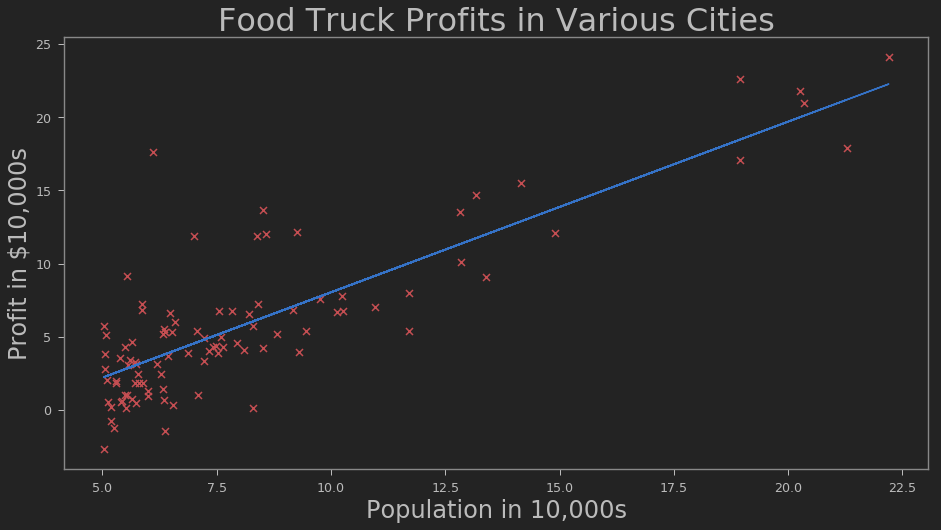

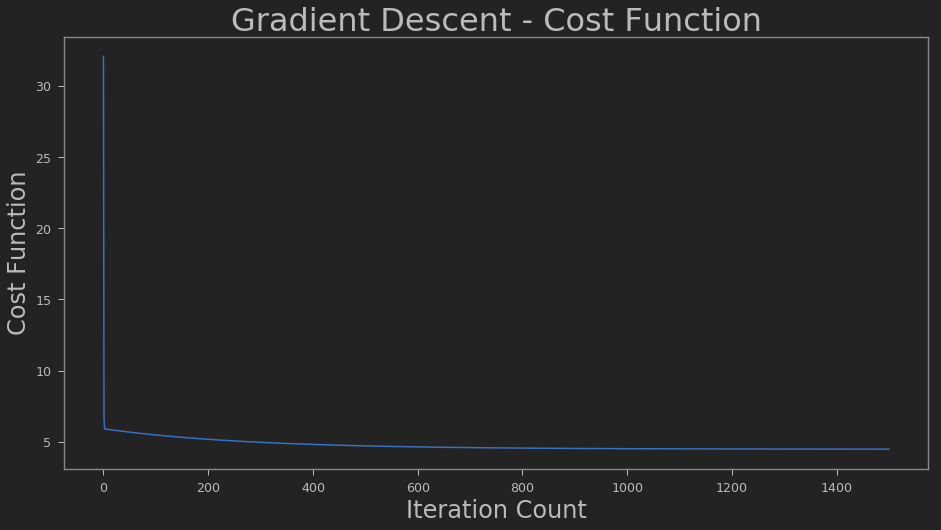

In [5]:
# Create the plot with the linear regression
fig=plt.figure(figsize=(12,6));
ax=fig.add_axes([0,0,1,1]);
ax.scatter(X[:,1],y,color='r',marker="x");
ax.plot(X[:,1],np.matmul(X,theta),color='b');
ax.set_xlabel('Population in 10,000s',fontsize=24);
ax.set_ylabel('Profit in $10,000s',fontsize=24);
ax.set_title('Food Truck Profits in Various Cities',fontsize=32);

# Create the plot showing the cost function history
fig=plt.figure(figsize=(12,6));
ax=fig.add_axes([0,0,1,1]);
ax.plot(np.array(range(iterations+1)),np.array(J),color='b');
ax.set_xlabel('Iteration Count',fontsize=24);
ax.set_ylabel('Cost Function',fontsize=24);
ax.set_title('Gradient Descent - Cost Function',fontsize=32);

Now let's try out our predictor for two examples:
* Population of 35,000
* Population of 70,000

In [6]:
# Estimate the profits for two population points
scale = 10000.
population1 = 3.5
population2 = 7.0
profit1 = float(np.matmul(np.array([1,population1]),theta))*scale
profit2 = float(np.matmul(np.array([1,population2]),theta))*scale
print("The profit estimated for a city with a population of "+\
      "{0:0.0f} is {1:0.2f}\n".format(population1*scale,profit1))
print("The profit estimated for a city with a population of "+\
      "{0:0.0f} is {1:0.2f}".format(population2*scale,profit2))

The profit estimated for a city with a population of 35000 is 4519.77

The profit estimated for a city with a population of 70000 is 45342.45


## Bivariate Linear Regression
Now we'll look at another example using *two* variables for the regression, this time going back to the housing prices prediction example from the lectures. We'll look at training sample data for prices of homes with varying square footage and number of bedrooms. Let's set up the data again and plot what we have.

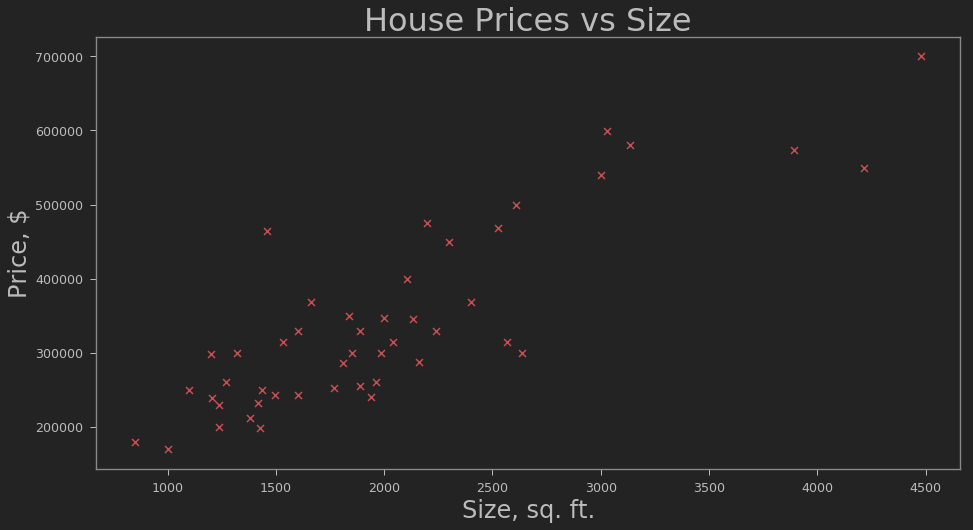

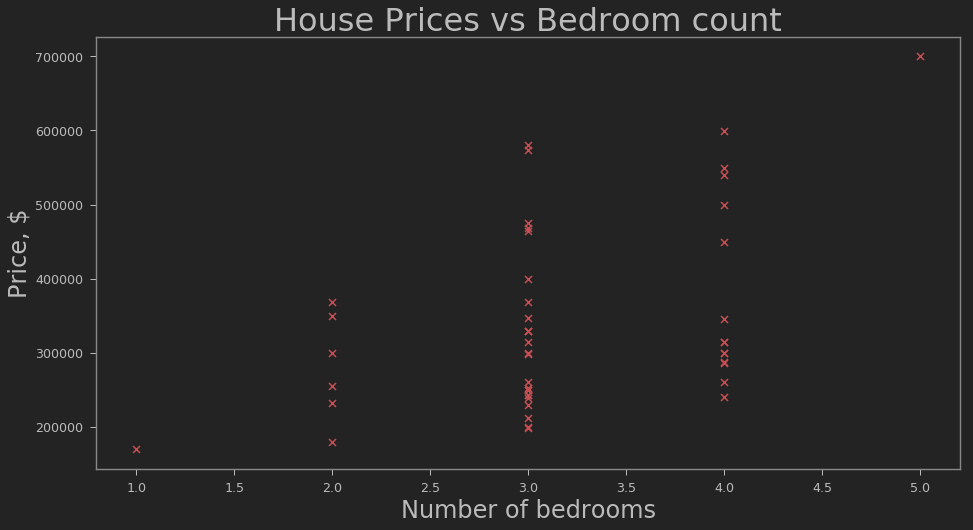

In [7]:
# Set the data location
dataDir = "./assignment/ex1/"
dataFile = "ex1data2.txt"
dataPath = dataDir+dataFile

# Load the data
data = pd.read_csv(dataPath,header=None).values
X = np.squeeze(np.expand_dims(data[:,0:2],axis=1)).astype(float)
y = np.expand_dims(data[:,2],axis=1).astype(float)
m = len(y)

# Create the plot of the training data for house sizes
fig=plt.figure(figsize=(12,6));
ax=fig.add_axes([0,0,1,1]);
ax.scatter(X[:,0],y,color='r',marker="x");
ax.set_xlabel('Size, sq. ft.',fontsize=24);
ax.set_ylabel('Price, $',fontsize=24);
ax.set_title('House Prices vs Size',fontsize=32);

# Create the plot of the training data for bedroom count
fig=plt.figure(figsize=(12,6));
ax=fig.add_axes([0,0,1,1]);
ax.scatter(X[:,1],y,color='r',marker="x");
ax.set_xlabel('Number of bedrooms',fontsize=24);
ax.set_ylabel('Price, $',fontsize=24);
ax.set_title('House Prices vs Bedroom count',fontsize=32);

Now let's run the gradient descent algorithm again, but this time, let's normalize the training data.

In [8]:
# Calulate the mean and standard deviations and normalize the input data
mu = [np.mean(X[:,i]) for i in range(X.shape[1])]
sigma = [np.std(X[:,i]) for i in range(X.shape[1])]
for i in range(X.shape[1]):
    X[:,i] = (X[:,i] - mu[i])/sigma[i]

# Set parameters for gradient descent
iterations = 1000
alpha = 0.01

# Add the extra column of ones to X and initiate theta parameters
X = np.concatenate((np.ones((m,1)),X),axis=1)
theta = np.expand_dims(np.array([0,0,0]),axis=1)

# Evaluate the initial cost function
J = [cost_function(X,y,theta)]

# Perform the gradient descent algorithm
theta,Jhistory = gradient_descent(X,y,theta,alpha,iterations)
J = J+Jhistory

Now let's predict the cost of a house with 1650 sq ft and 3 bedrooms

In [9]:
# Provide the non-normalized parameters
x = [1,1650,3]
xNonnormal = x
x = np.array(x)

# Scale them back to normalized
x[1:3] = (x[1:3] - mu) / sigma 

# Calculate the price
price = float(np.matmul(x,theta))
print("The price estimated for a house with a size of "+\
      "{0:0.0f} sq. ft. and {1:0.0f} bedrooms is {2:0.2f}"+\
      "\n".format(int(xNonnormal[1]),int(xNonnormal[2]),price))

The price estimated for a house with a size of {0:0.0f} sq. ft. and {1:0.0f} bedrooms is {2:0.2f}



To make sure everything looks correct, let's plot the cost function as calculated throughout the gradient descent.

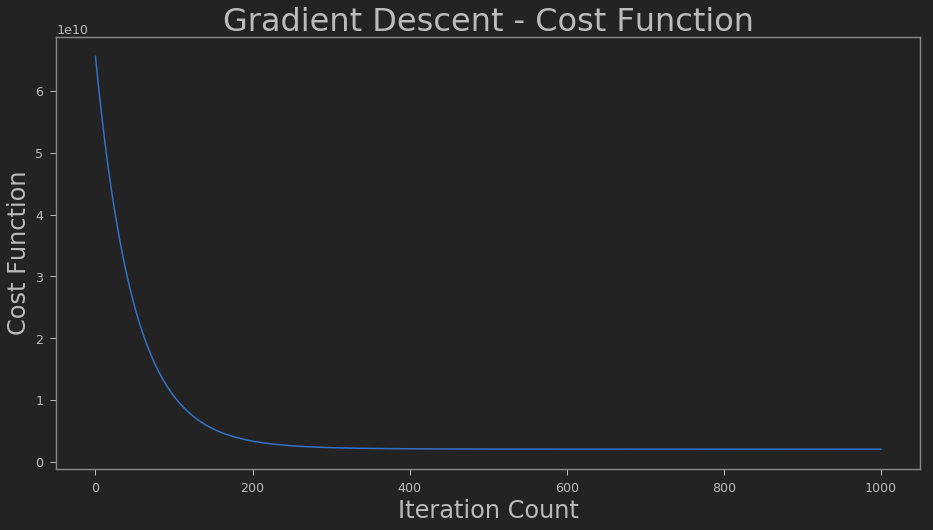

In [11]:
# Create the plot showing the cost function history
fig=plt.figure(figsize=(12,6));
ax=fig.add_axes([0,0,1,1]);
ax.plot(np.array(range(iterations+1)),np.array(J),color='b');
ax.set_xlabel('Iteration Count',fontsize=24);
ax.set_ylabel('Cost Function',fontsize=24);
ax.set_title('Gradient Descent - Cost Function',fontsize=32);

## The Normal Equation
Lastly, we can solve the above equation using the normal equation instead of using gradient descent. Recall that the formula to solve using the normal equation was 

$$
\theta = (X^T X)^{-1} X^T y
$$

So we'll have to make a function that evaluates this and then solve for our linear regression.

In [12]:
# Define a function that solves for theta using the normal equation
def normal_equation(X,y):
    
    """Solve for theta using the normal equation"""
    
    return np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(X),X)),np.transpose(X)),y)

Reload the data, since our old data was normalized (we don't have to normalize with the normal equation)

In [13]:
# Set the data location
dataDir = "./assignment/ex1/"
dataFile = "ex1data2.txt"
dataPath = dataDir+dataFile

# Load the data
data = pd.read_csv(dataPath,header=None).values
X = np.squeeze(np.expand_dims(data[:,0:2],axis=1)).astype(float)
X = np.concatenate((np.ones((m,1)),X),axis=1)
y = np.expand_dims(data[:,2],axis=1).astype(float)

# Calculate theta using the normal equation
theta = normal_equation(X,y)

And finally, let's predict the price of the house

In [14]:
# Provide the non-normalized parameters
x = [1,1650,3]
x = np.array(x)

# Calculate the price
price = float(np.matmul(x,theta))
print("The price estimated for a house with a size of "+\
      "{0:0.0f} sq. ft. and {1:0.0f} bedrooms is {2:0.2f}\n".format(int(x[1]),int(x[2]),price))

The price estimated for a house with a size of 1650 sq. ft. and 3 bedrooms is 293081.46

